In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin

housing = pd.read_csv('housing.csv', header=0,sep=',' )
housing.head(10)

#housing.hist(bins = 50, figsize = (20,15))
#plt.show()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state= 42)
train_set.shape
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,103000,NEAR OCEAN
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,382100,NEAR OCEAN
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,172600,NEAR OCEAN
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,93400,NEAR OCEAN
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,96500,INLAND


(16512, 10)

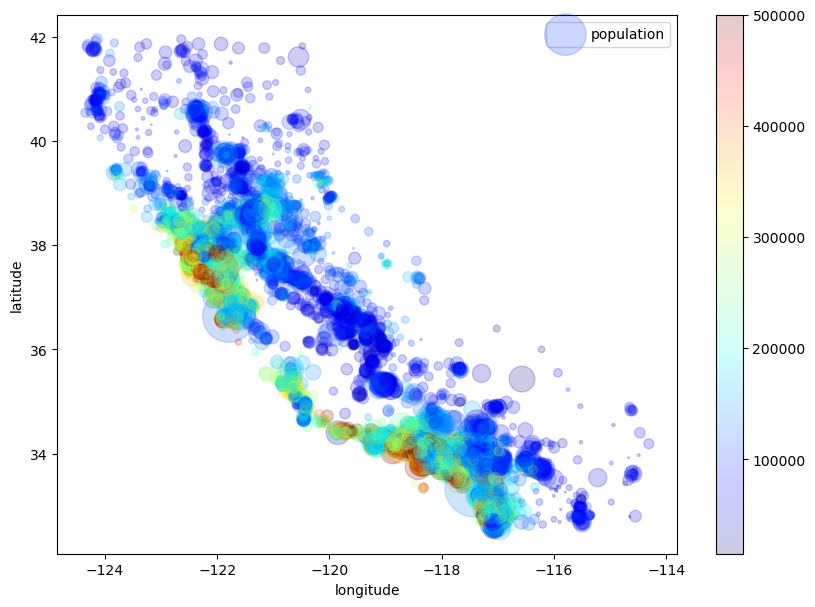

In [32]:
data = train_set.copy()
data.plot(kind="scatter", x = "longitude", y = "latitude",s = data["population"]/20,label="population"
          , figsize = (10,7), alpha = 0.2, c=data["median_house_value"], cmap=plt.get_cmap("jet"))
data.shape

In [33]:
# standard correltion coefficient [-1,1]
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Narges Jooshaghani\AppData\Local\Temp\ipykernel_9212\1652292666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

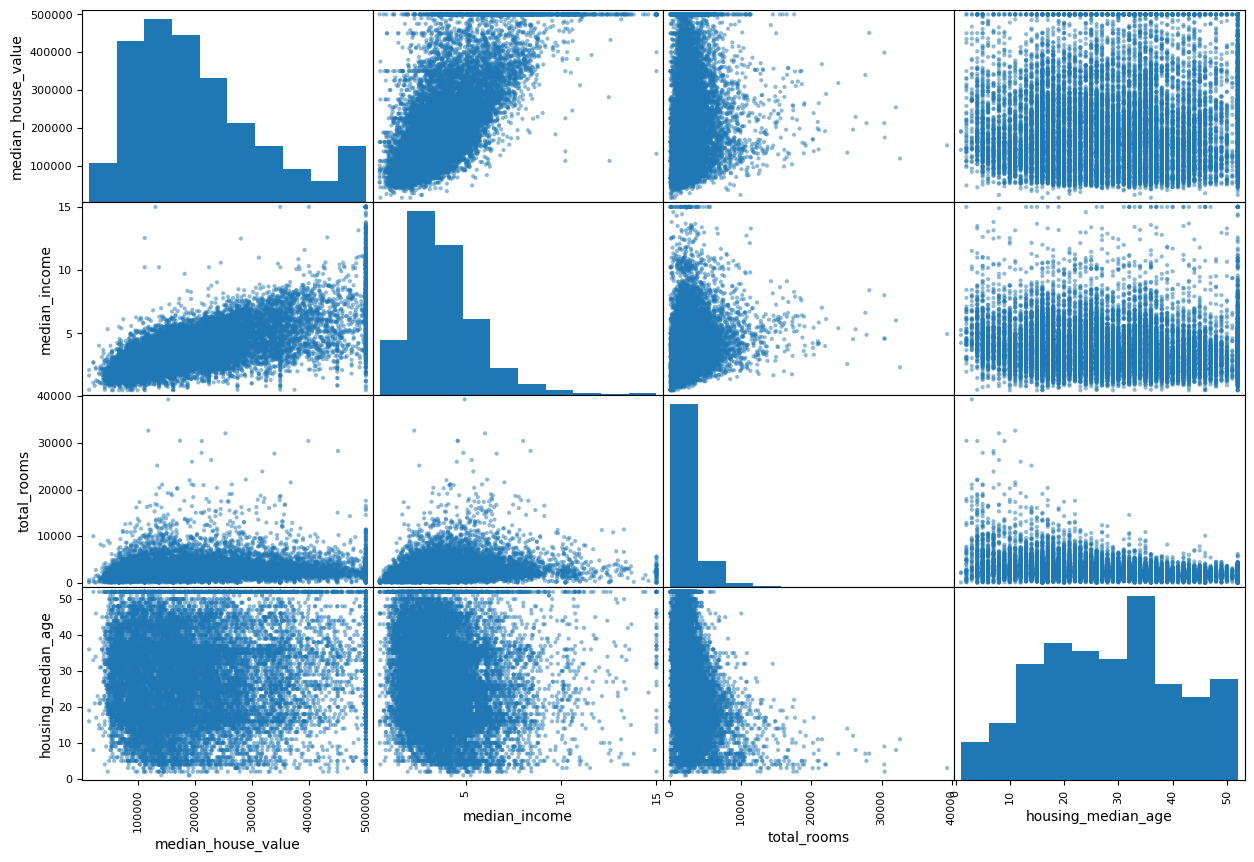

In [34]:
features = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(data[features],figsize =(15,10))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

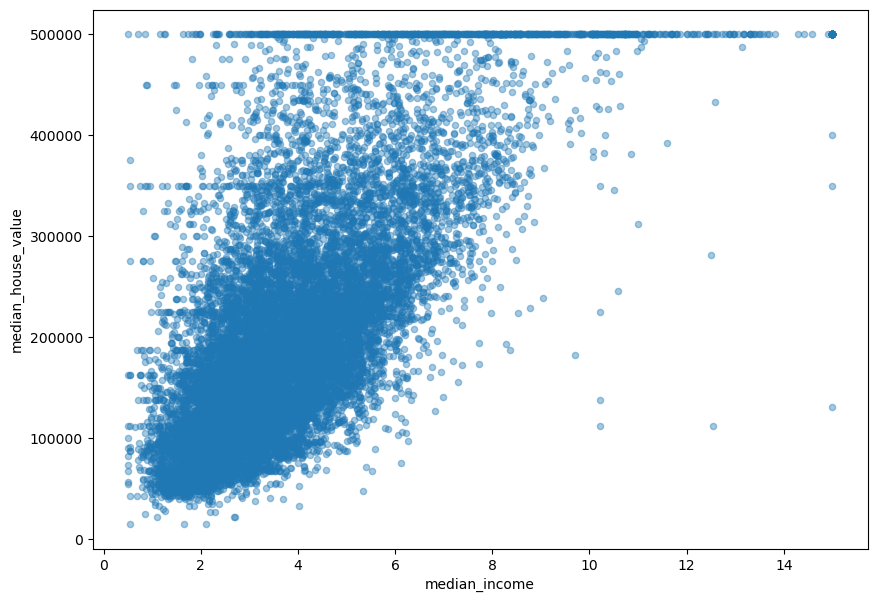

In [35]:
#data = train_set.copy()
data.plot(kind="scatter", x = "median_income", y = "median_house_value", figsize = (10,7), alpha = 0.4)

In [36]:
data["total_rooms_per_households"] = data["total_rooms"] / data["households"]
data["total_bedrooms_per_total_rooms"] = data["total_bedrooms"] / data["total_rooms"]
data["population_per_households"] = data["population"] / data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_total_rooms,population_per_households
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,103000,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,382100,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,172600,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,93400,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,96500,INLAND,6.268421,0.180940,2.300000


In [37]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Narges Jooshaghani\AppData\Local\Temp\ipykernel_9212\3974275619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
latitude                         -0.142983
total_bedrooms_per_total_rooms   -0.257419
Name: median_house_value, dtype: float64

In [38]:
#====================================Prepare the Data========================================
#================= Numerical data ===>>>mission value
#================= Categorical and text data ===>>>LableEncoder, OneHotEncoder
#================= Numerical data ===>>>  feature Scaling
#================= Numerical data ===>>> Custom Transformers


#============================================== SimpleImputer=================================

df= train_set.copy()
df_lable = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)

df_num = df.drop('ocean_proximity', axis=1)

#====== missing data (1.drop_row, 2.drop_columns, 3.replace)
#df_num =df_num.dropna(subset=["total_bedrooms"]) Option 1
#df_num.drop("total_bedrooms", axis=1)            Option 2
#median = df_num["total_bedrooms"].median()       Option 3
#df_num["total_bedrooms"].fillna(medain)


imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_num)
x = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(x, columns=df_num.columns)
#df_num_impute_tr.info()
#df_num.info()

#======================================================== Custom Transform =====================================================
#برای باکسازی کردن ستون های دستی
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y= None):
        return self
    
    def transform(self, x, y=None):
        room_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]
        bedrooms_per_room = x[:, bedrooms_ix] / x[:,rooms_ix]
        return np.c_[x, room_per_household, population_per_household, bedrooms_per_room]
    
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append("room_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
#========================================================= Feature Scaling =======================================================
#اگر یک سری داده داشته باشیم ک این داده ها بسیار متنوع باشند یعنی بین مینیموم و ماکسیموم فاصبه زیادی داشته باشند 
#الگوریتم ها به خوبی کار نمیکنند

#data_custom_tr.describe()

#1.Standardization 2.Normalizition [0,1]
from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scald = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)

#======================================================= LabelEncoder ==========================================================
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_encode = encoder.fit_transform(data_cat)
data_cat_encode = pd.DataFrame(data_cat_encode, columns=["ocean_proximity"])



#=======================================================OneHotEncoder===========================================================

from sklearn.preprocessing import OneHotEncoder
encoder_1hot = OneHotEncoder(sparse_output=False) # sparse make All our data is a single number
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names_out()

final = pd.concat([data_num_scald,data_cat_1hot], axis=1)
final.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0
5,-1.135679,0.831625,-0.683082,1.099060,0.643214,1.115675,0.790151,1.439919,0.354757,0.023111,-0.901575,1.0,0.0,0.0,0.0,0.0
6,0.803897,-0.750327,-0.048268,-0.439627,-0.289972,-0.062842,-0.293963,-0.715013,-0.456530,0.034142,0.594427,1.0,0.0,0.0,0.0,0.0
7,-1.469745,1.060961,0.665897,-0.054266,-0.335319,-0.375941,-0.217838,2.157529,0.258670,-0.060568,-0.951342,0.0,0.0,0.0,1.0,0.0
8,0.838800,-0.708204,-1.873359,-0.697148,-0.531026,-0.534249,-0.496085,-1.250241,-0.760128,-0.040033,1.168774,1.0,0.0,0.0,0.0,0.0
9,0.893646,-0.759688,-1.873359,7.379811,5.545428,7.036405,5.977096,1.336938,0.542474,0.025712,-1.029905,1.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, x, y= None):
        return self
    
    def transform(self, x, y=None):
        room_per_household = x[:, rooms_ix] / x[:, household_ix]
        population_per_household = x[:, population_ix] / x[:, household_ix]
        bedrooms_per_room = x[:, bedrooms_ix] / x[:,rooms_ix]
        return np.c_[x, room_per_household, population_per_household, bedrooms_per_room]
    
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.attribute_names].values
    
df = train_set.copy()
df_lable = df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)

df_num = df.drop(["ocean_proximity"], axis=1)
num_attr = list(df_num)
cat_attr = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr)),
    ('impute',SimpleImputer(missing_values=np.nan, strategy='median')),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
    
])


full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline",num_pipeline),
        ("cat_pipeline",cat_pipeline),    
])

housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=[ "longitude","latitude","housing_median_age",
                                   "total_rooms","total_bedrooms","population","households","median_income",
                                   "room_per_household","population_per_household","bedrooms_per_room",
                                   "ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND",
                                   "ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN "])

housing_prepared_df.head(5)


    
 	 	 	 	
                                    	 	 	 	
                                    	 	 	
                                    
                                    	 	 	
                                      
    
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [40]:
# این کد با الگو لاین رگ بیش بینی میکند 
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)            # ستونهای اولیه و مقدار نهایی
sample_data_prepare = housing_prepared_df.iloc[:4]
print("Prediction:\t", lin_reg.predict(sample_data_prepare))
            
sample_labels = df_label.iloc[:4]
print("Lables:\t\t", list(sample_labels))

NameError: name 'df_label' is not defined

In [ ]:
# RMSE ==>  برای مقایسه استفاده میشود
# میان گین تفاوت با مقادیر واقعی به ما میگه
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_lable, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
#استفاده از الگو دسیژن تری
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 


tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_lable)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_lable, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_lable, scoring="neg_mean_squared_error", cv =10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("=============", model_name, "===============")
    print("Scores:", scores)
    print("Mean:", scores.mean()) # مهم
    print("Standard deviation", scores.std()) #تفاوت بین ارور هارو نشون میده
    print("==============================================================")
    
display_scores(trees_rmse_scores, "Decision Tree Regression ")

============= Decision Tree Regression  ===============
Scores: [63798.68035694 71818.83139897 68043.46018045 71362.31056313
 73634.65866884 67870.67104824 66712.74787238 68866.2357655
 68050.74558536 70717.63905456]
Mean: 69087.59804943674
Standard deviation 2706.926482463874


In [44]:
# Linear with Cross_val_score
linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_lable, scoring="neg_mean_squared_error", cv =10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, "Lineaer Regression")

============= Lineaer Regression ===============
Scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Mean: 67828.38677377408
Standard deviation 2468.0913950652284


In [46]:
#الگوریتم RandomForestRegression
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_lable)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_lable, scoring="neg_mean_squared_error", cv=10)
forest_scores_rms = np.sqrt(-forest_scores)
display_scores(forest_scores_rms, "Random Forest Regressor")


============= Random Forest Regressor ===============
Scores: [47108.37270987 51561.08891381 49660.27379477 52058.0828468
 52721.43999469 46927.87560789 47975.51003077 51085.39946702
 49207.8497506  50277.70641555]
Mean: 49858.35995317738
Standard deviation 1943.5654166176269
